## Instructions {-}

1. This template serves as the required format for your code and report submission for the Prediction Problem assignment.
2. You may modify the template to improve readability or add relevant details, but it must include all requested information.
3. Ensure that your work is reproducible, meaning your code should consistently yield a metric value close to your Kaggle leaderboard score despite inherent randomness in data science.

## 1) Exploratory Data Analysis (EDA)

* Summarize key insights obtained from the dataset.
* Discuss trends, correlations, or anomalies that influenced your modeling decisions.
* Provide relevant data visualizations (e.g., histograms, scatter plots, correlation matrices) to support your findings.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [17]:
train_X = pd.read_csv('/Users/miracleidowu/Desktop/stat 303-1/prediction_problem/train_X.csv')
train_y = pd.read_csv('/Users/miracleidowu/Desktop/stat 303-1/prediction_problem/train_y.csv')
test_X = pd.read_csv('/Users/miracleidowu/Desktop/stat 303-1/prediction_problem/public_private_X.csv')
sample_submission = pd.read_csv('/Users/miracleidowu/Desktop/stat 303-1/prediction_problem/submission.csv')

In [18]:
print("Train_X shape:", train_X.shape)
print("Train_y shape:", train_y.shape)
print("Test_X shape:", test_X.shape)
print("Sample submission shape:", sample_submission.shape)

print(train_X.head())
print(train_y.head())
print(test_X.head())
print(sample_submission.head())

# Check for missing values
print("Missing values in train_X:\n", train_X.isnull().sum())
print("Missing values in train_y:\n", train_y.isnull().sum())
print("Missing values in test_X:\n", test_X.isnull().sum())


Train_X shape: (20413, 28)
Train_y shape: (20413, 2)
Test_X shape: (10247, 28)
Sample submission shape: (10247, 2)
   ID  DIVISION_NUMBER  PRODUCT_NUMBER PURCHASE_ORDER_DUE_DATE  \
0   0              101            3960              2014-07-31   
1   2              101            5479              2014-09-02   
2   3              102            5035              2014-07-08   
3   5              102            4339              2014-08-01   
4   6              102            2771              2014-09-11   

   COMPANY_VENDOR_NUMBER  SHIP_FROM_VENDOR  ORDER_DATE  ORDER_DAY_OF_WEEK  \
0                   1295              1371  2014-07-26                  0   
1                   1295              1371  2014-08-20                  5   
2                   1632                29  2014-06-28                  0   
3                    365               407  2014-07-24                  6   
4                     41                42  2014-09-03                  5   

   PRODUCT_CLASSIFICATION

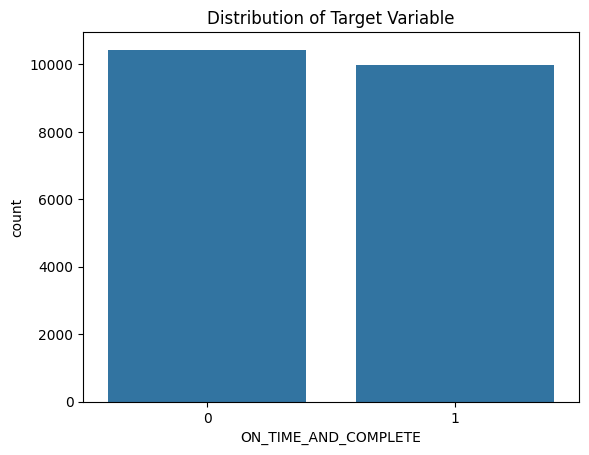

ON_TIME_AND_COMPLETE
0    0.511145
1    0.488855
Name: proportion, dtype: float64


In [19]:
# Check target variable distribution
sns.countplot(x=train_y["ON_TIME_AND_COMPLETE"])
plt.title("Distribution of Target Variable")
plt.show()

# Print value counts
print(train_y["ON_TIME_AND_COMPLETE"].value_counts(normalize=True))


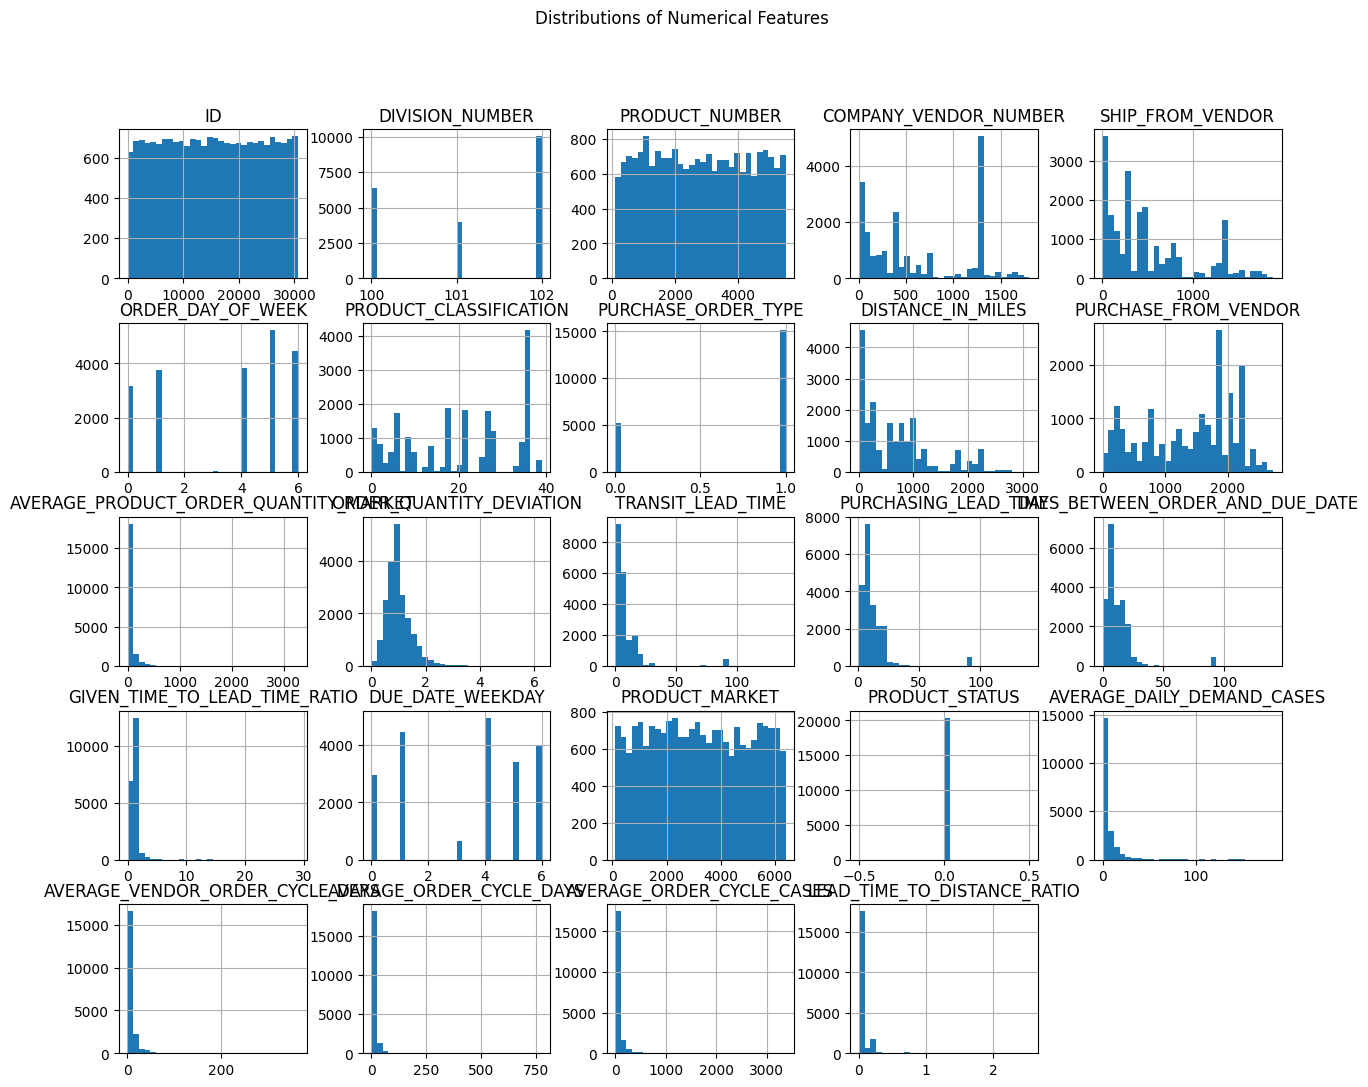

In [20]:
# Select only numerical columns
numerical_features = train_X.select_dtypes(include=['number'])

# Plot histograms
numerical_features.hist(figsize=(15, 12), bins=30)
plt.suptitle("Distributions of Numerical Features")
plt.show()


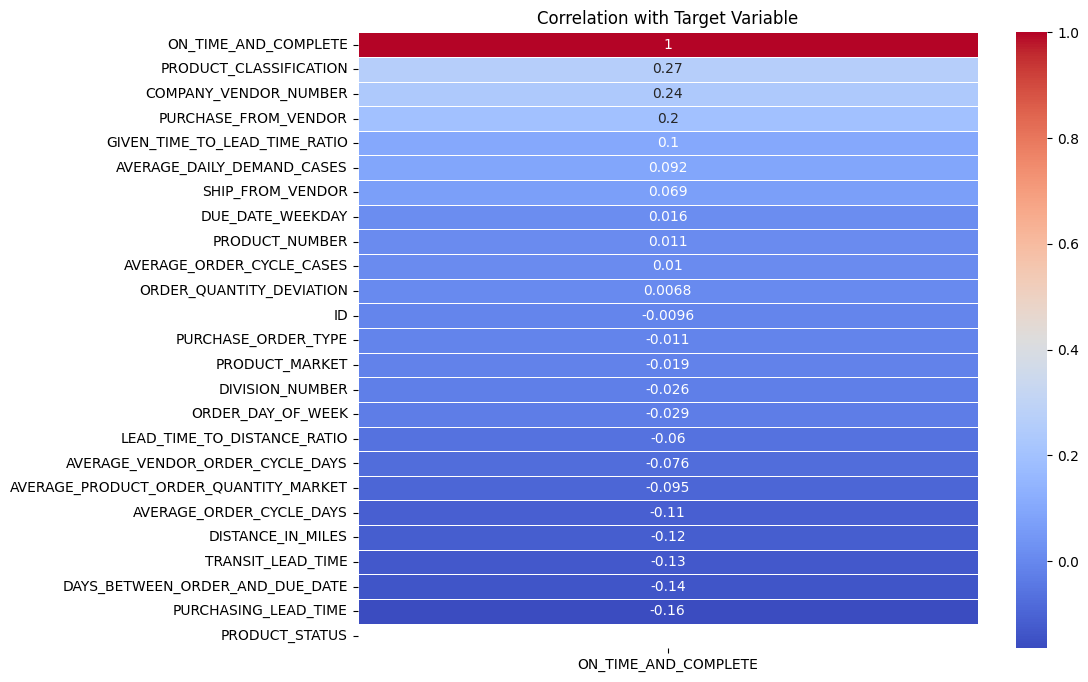

In [21]:
numerical_features["ON_TIME_AND_COMPLETE"] = train_y["ON_TIME_AND_COMPLETE"]

correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['ON_TIME_AND_COMPLETE']].sort_values(by="ON_TIME_AND_COMPLETE", ascending=False), 
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation with Target Variable")
plt.show()


## 2) Data Preprocessing

Describe any preprocessing steps performed on your dataset. This may include imputing missing values, creating dummy variables, combining levels of categorical variable(s), discarding predictors that are not useful, etc.

In [22]:
numerical_cols = ['PRODUCT_CLASSIFICATION', 'COMPANY_VENDOR_NUMBER', 'PURCHASE_FROM_VENDOR', 
                  'PURCHASING_LEAD_TIME', 'DISTANCE_IN_MILES', 'AVERAGE_DAILY_DEMAND_CASES',
                  'AVERAGE_VENDOR_ORDER_CYCLE_DAYS', 'AVERAGE_ORDER_CYCLE_DAYS', 
                  'AVERAGE_ORDER_CYCLE_CASES', 'LEAD_TIME_TO_DISTANCE_RATIO']

scaler = StandardScaler()

train_X_scaled = train_X.copy() 
train_X_scaled[numerical_cols] = scaler.fit_transform(train_X[numerical_cols])

test_X_scaled = test_X.copy()
test_X_scaled[numerical_cols] = scaler.transform(test_X[numerical_cols])

train_X_scaled.head()


,ID,DIVISION_NUMBER,PRODUCT_NUMBER,PURCHASE_ORDER_DUE_DATE,COMPANY_VENDOR_NUMBER,SHIP_FROM_VENDOR,ORDER_DATE,ORDER_DAY_OF_WEEK,PRODUCT_CLASSIFICATION,PURCHASE_ORDER_TYPE,...,GIVEN_TIME_TO_LEAD_TIME_RATIO,DUE_DATE_WEEKDAY,PRODUCT_MARKET,RESERVABLE_INDICATOR,PRODUCT_STATUS,AVERAGE_DAILY_DEMAND_CASES,AVERAGE_VENDOR_ORDER_CYCLE_DAYS,AVERAGE_ORDER_CYCLE_DAYS,AVERAGE_ORDER_CYCLE_CASES,LEAD_TIME_TO_DISTANCE_RATIO
0,0,101,3960,2014-07-31,1.243505,1371,2014-07-26,0,1.266278,0,...,0.71,6,5327,Y,0,-0.420528,-0.199552,-0.316037,-0.442335,-0.298158
1,2,101,5479,2014-09-02,1.243505,1371,2014-08-20,5,1.266278,0,...,0.65,1,6135,Y,0,0.162174,-0.199552,-0.316781,-0.111981,0.008750
2,3,102,5035,2014-07-08,1.878560,29,2014-06-28,0,-0.925548,1,...,1.25,1,3625,Y,0,-0.471233,0.470259,0.614505,-0.331670,-0.435459
3,5,102,4339,2014-08-01,-0.509023,407,2014-07-24,6,0.454490,1,...,1.00,4,1709,Y,0,-0.299997,-0.046277,0.023425,-0.034434,1.333302
4,6,102,2771,2014-09-11,-1.119582,42,2014-09-03,5,-1.656157,0,...,0.50,6,193,Y,0,0.540389,-0.105867,-0.236983,0.722028,0.032980


In [23]:
categorical_cols = ['RESERVABLE_INDICATOR', 'DUE_DATE_WEEKDAY', 'PURCHASE_ORDER_TYPE']

train_X_encoded = pd.get_dummies(train_X_scaled, columns=categorical_cols, drop_first=True)
test_X_encoded = pd.get_dummies(test_X_scaled, columns=categorical_cols, drop_first=True)

train_X_encoded, test_X_encoded = train_X_encoded.align(test_X_encoded, join='left', axis=1, fill_value=0)

train_X_encoded.head()


,ID,DIVISION_NUMBER,PRODUCT_NUMBER,PURCHASE_ORDER_DUE_DATE,COMPANY_VENDOR_NUMBER,SHIP_FROM_VENDOR,ORDER_DATE,ORDER_DAY_OF_WEEK,PRODUCT_CLASSIFICATION,DISTANCE_IN_MILES,...,AVERAGE_ORDER_CYCLE_DAYS,AVERAGE_ORDER_CYCLE_CASES,LEAD_TIME_TO_DISTANCE_RATIO,DUE_DATE_WEEKDAY_1,DUE_DATE_WEEKDAY_2,DUE_DATE_WEEKDAY_3,DUE_DATE_WEEKDAY_4,DUE_DATE_WEEKDAY_5,DUE_DATE_WEEKDAY_6,PURCHASE_ORDER_TYPE_1
0,0,101,3960,2014-07-31,1.243505,1371,2014-07-26,0,1.266278,-0.552736,...,-0.316037,-0.442335,-0.298158,False,False,False,False,False,True,False
1,2,101,5479,2014-09-02,1.243505,1371,2014-08-20,5,1.266278,-0.552736,...,-0.316781,-0.111981,0.008750,True,False,False,False,False,False,False
2,3,102,5035,2014-07-08,1.878560,29,2014-06-28,0,-0.925548,2.122715,...,0.614505,-0.331670,-0.435459,True,False,False,False,False,False,True
3,5,102,4339,2014-08-01,-0.509023,407,2014-07-24,6,0.454490,-1.009947,...,0.023425,-0.034434,1.333302,False,False,False,True,False,False,True
4,6,102,2771,2014-09-11,-1.119582,42,2014-09-03,5,-1.656157,-0.675946,...,-0.236983,0.722028,0.032980,False,False,False,False,False,True,False


In [24]:
train_X_encoded['PURCHASE_ORDER_DUE_DATE'] = pd.to_datetime(train_X_encoded['PURCHASE_ORDER_DUE_DATE'])
train_X_encoded['ORDER_DATE'] = pd.to_datetime(train_X_encoded['ORDER_DATE'])

train_X_encoded['DUE_YEAR'] = train_X_encoded['PURCHASE_ORDER_DUE_DATE'].dt.year
train_X_encoded['DUE_MONTH'] = train_X_encoded['PURCHASE_ORDER_DUE_DATE'].dt.month
train_X_encoded['DUE_DAY'] = train_X_encoded['PURCHASE_ORDER_DUE_DATE'].dt.day

train_X_encoded['ORDER_YEAR'] = train_X_encoded['ORDER_DATE'].dt.year
train_X_encoded['ORDER_MONTH'] = train_X_encoded['ORDER_DATE'].dt.month
train_X_encoded['ORDER_DAY'] = train_X_encoded['ORDER_DATE'].dt.day

train_X_encoded = train_X_encoded.drop(columns=['PURCHASE_ORDER_DUE_DATE', 'ORDER_DATE'])
train_X_encoded['DIVISION_CODE'] = train_X_encoded['DIVISION_CODE'].astype(str)
train_X_encoded = pd.get_dummies(train_X_encoded, columns=['DIVISION_CODE'], drop_first=True)

In [25]:
train_X_encoded.fillna(train_X_encoded.median(), inplace=True)


In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg.fit(train_X_encoded, train_y['ON_TIME_AND_COMPLETE'])

logreg = LogisticRegression(max_iter=1000000)  # Increase from default 100 to 500
logreg.fit(train_X_encoded, train_y['ON_TIME_AND_COMPLETE'])

# Check coefficients to see feature importance
coefficients = pd.DataFrame({'Feature': train_X_encoded.columns, 'Coefficient': logreg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients.head(10) 


/Users/miracleidowu/Desktop/stat 303-1/stat_303/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/miracleidowu/Desktop/stat 303-1/stat_303/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sc

,Feature,Coefficient
26,DUE_DATE_WEEKDAY_5,0.539870
3,COMPANY_VENDOR_NUMBER,0.461861
14,GIVEN_TIME_TO_LEAD_TIME_RATIO,0.293806
6,PRODUCT_CLASSIFICATION,0.275447
24,DUE_DATE_WEEKDAY_3,0.235592
17,AVERAGE_DAILY_DEMAND_CASES,0.214036
8,PURCHASE_FROM_VENDOR,0.185513
20,AVERAGE_ORDER_CYCLE_CASES,0.170678
1,DIVISION_NUMBER,0.092730
18,AVERAGE_VENDOR_ORDER_CYCLE_DAYS,0.016965


## 3) Feature Engineering

* List and explain the new features you created (if any).
* Justify why these features were added and how they contribute to improving the model.

Mention the logical/intuitive steps you took to obtain the final model. This may include identifying transformations, significant interactions, variable selection, etc. You do not need to put any code here.

ANSWER: I encoded categorical variables and converted dates to datetime.

## 4) Model Selection and Training

Put your model here.

In [27]:
import warnings
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning

# Ignore Convergence Warnings (optional)
warnings.simplefilter("ignore", ConvergenceWarning)

# Identify numeric & categorical columns
numeric_features = train_X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Median imputation for numeric features
    ('scaler', StandardScaler())  # Standardize numerical data
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Mode imputation for categorical features
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encoding
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define final pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))  # Increase iterations for convergence
])

# Fit pipeline on training data
pipeline.fit(train_X, train_y['ON_TIME_AND_COMPLETE'])

# Make predictions
preds = pipeline.predict(test_X)


## 5) Model Prediction and Evaluation

In [28]:
from sklearn.metrics import accuracy_score

# Predict on training and test sets
train_preds = pipeline.predict(train_X)
test_preds = pipeline.predict(test_X)

# Calculate accuracy
train_acc = accuracy_score(train_y['ON_TIME_AND_COMPLETE'], train_preds)

print(f"Training Accuracy: {train_acc:.4f}")

Training Accuracy: 0.7504


In [29]:
from sklearn.metrics import classification_report

print("Classification Report on Training Data:")
print(classification_report(train_y['ON_TIME_AND_COMPLETE'], train_preds))


Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77     10434
           1       0.77      0.70      0.73      9979

    accuracy                           0.75     20413
   macro avg       0.75      0.75      0.75     20413
weighted avg       0.75      0.75      0.75     20413



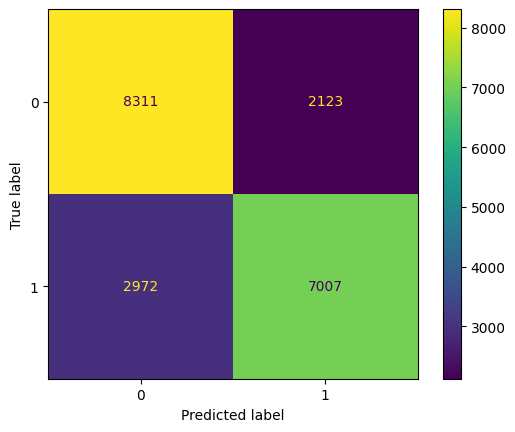

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(train_y['ON_TIME_AND_COMPLETE'], train_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


Please note that your code for Questions 2, 4, and 5 will be executed sequentially, and it should generate a metric value close to the one displayed next to your name on the Kaggle leaderboard. While minor variations due to randomness in data science are expected, your implementation must be consistent and reproducible to receive full credit.

## 6) Complete Code Submission

* Provide a link to your Kaggle notebook or a GitHub repository containing your code.
* Ensure the notebook is properly commented and reproducible.

## 7) Reflection and Challenges

* Discuss any challenges faced during this process and how they were addressed.
* Mention any improvements you would make for the next steps

Challenges: finding interaction terms but i was able to address it by creating new variables,
Next steps: cross validation